In [1]:
# import pandas as pd
# import numpy as np
# import os
# from collections import defaultdict
# from collections import Counter
# import matplotlib.pyplot as plt

# def dummy(doc):
#     return doc

# def read_labeled_file(infile):
#     LabeledRecords_original = []
#     with open(infile, 'r', encoding = 'utf8') as f:
#         for line in f:
#             read_data = line.split("\t")
#             # get ride of bad formated lines
#             if(len(read_data)==13 or len(read_data)==12):
#                 paper_detail = {"paperID": read_data[0], "authorID":read_data[1], 
#                                 "co-author": read_data[5], "venue_id": read_data[7]}
#                 LabeledRecords_original.append(paper_detail)
#             else:
#                 print(len(read_data))
#         f.close()
#     return pd.DataFrame(LabeledRecords_original)

In [3]:
# load text information
Dataset = "pubmed"
raw_filepath = "Data"+"/"+Dataset+"/id_text_combined_labeled.txt"
all_text_content = []
with open(raw_filepath, 'r', encoding = 'utf8') as f:
    # items[0] is paper ID, items[1] is title, items[2] is abstract
    for line in f:
        items = line.split("\t")
        # lower case all character
        paperID = items[0]
        title = items[1].lower()
        keywords = items[2].lower()
        mesh = items[3].lower()
        abstract = items[4].lower()
        # text information can be defined as all feature combined
        content = title+" "+keywords+" "+mesh+" "+abstract
        paper_text_content = {"paperID": paperID, "title":title, "keywords":keywords, "mesh":mesh,
                              "abstract": abstract, "combine_text":content}
        all_text_content.append(paper_text_content)
print("Total ", len(all_text_content), " labeled paper have text information")

Total  135796  labeled paper have text information


In [9]:
# load labeled data
fileDir = "Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)
LabeledRecords_original = []

for file in listfiles:
    if not file.startswith('.'):
        with open(fileDir+file, 'r', encoding = 'utf8') as f:
            for line in f:
                read_data = line.split("\t")
                # some record's doi contain \r or \n character in which creating issue, since we do not use those, ignore it
                if(len(read_data)==13 or len(read_data)==12):
                    paper_detail = {"paperID": read_data[0], "authorID":read_data[1], "total_author": read_data[3],
                                    "author_name": read_data[4], "co-author": read_data[5], "department": read_data[6],
                                    "venue_id": read_data[7], "publish_year": read_data[10]}
                    LabeledRecords_original.append(paper_detail)
                else:
                    print(len(read_data))
        f.close

paperID = set(d['paperID'] for d in LabeledRecords_original)
print("Total labeled records:",len(LabeledRecords_original))
print("Total unique papers:",len(paperID))

Total labeled records: 140266
Total unique papers: 135796


In [10]:
# convert to dataframe so it's easy to process
all_text_content_df = pd.DataFrame(all_text_content)
LabeledRecords = pd.DataFrame(LabeledRecords_original)
LabeledRecords = pd.merge(all_text_content_df, LabeledRecords, how='inner', on="paperID")
print(LabeledRecords.shape)

(140266, 13)


In [11]:
import com_func
import multiprocessing as mp
# title average token size after preprocess
cleaned_title, title_token_size= com_func.clean_batch_of_raw(all_text_content_df['title'], stopword=True)
# abstract average token size after preprocess
cleaned_abstract, abstract_token_size= com_func.clean_batch_of_raw(all_text_content_df['abstract'], stopword=True)
# mesh average token size after preprocess
cleaned_mesh, mesh_token_size= com_func.clean_batch_of_raw(all_text_content_df['mesh'], stopword=True)
# keywords average token size after preprocess
cleaned_keywords, keywords_token_size= com_func.clean_batch_of_raw(all_text_content_df['keywords'], stopword=True)
# combined average token size after preprocess
cleaned_text, text_token_size= com_func.clean_batch_of_raw(all_text_content_df['combine_text'], stopword=True)

In [12]:
print(np.sum(title_token_size)/len(title_token_size))
print(np.sum(abstract_token_size)/len(abstract_token_size))
print(np.sum(mesh_token_size)/len(mesh_token_size))
print(np.sum(keywords_token_size)/len(keywords_token_size))
print(np.sum(text_token_size)/len(text_token_size))

10.309537836166013
116.9032372087543
18.959549618545466
1.5997157500957317
147.7720404135615


In [13]:
#print(title_token_size)
print(title_token_size[0])

short_title = LabeledRecords[LabeledRecords['title'].str.len()<50]
with pd.option_context('display.max_colwidth', 1000):
    print(short_title.iloc[:3]['title'])

11


In [14]:
LabeledRecords.head()

,abstract,combine_text,keywords,mesh,paperID,title,authorID,author_name,co-author,department,publish_year,total_author,venue_id
0,a sensitive technique for the direct calorimet...,energetics of primary processes in visula esci...,,animals$$binding sites$$calorimetry$$cattle$$f...,8077,energetics of primary processes in visula esci...,0000-0001-6709-7343,a cooper,converse,,1976,2,1036
1,\n,ultrastructural features of osmotic shock in m...,,animals$$bivalvia$$cilia$$colchicine$$cytosol$...,17755,ultrastructural features of osmotic shock in m...,0000-0002-6279-9685,t j smith,kilburn hess thurston,,1977,4,3729
2,the metabolism of polybrominated biphenyls (pb...,studies on the microsomal metabolism and bindi...,,animals$$biotransformation$$biphenyl compounds...,28220,studies on the microsomal metabolism and bindi...,0000-0001-7221-6693,r w moore,dannan aust,,1978,3,8877
3,the activity of 8 widely antipsychotic drugs a...,antagonism of central histamine h1 receptors b...,,"animals$$antipsychotic agents$$binding, compet...",32056,antagonism of central histamine h1 receptors b...,0000-0002-4424-239X,s j hill,young,,1978,2,2246
4,\n,post mortem stability and storage in the cold ...,,animals$$caudate nucleus$$choline o-acetyltran...,33233,post mortem stability and storage in the cold ...,0000-0003-4217-5717,p gaspar,puymirat javoy-agid ploska prochiantz agid,,1979,6,3585


In [15]:
LabeledRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140266 entries, 0 to 140265
Data columns (total 13 columns):
abstract        140266 non-null object
combine_text    140266 non-null object
keywords        140266 non-null object
mesh            140266 non-null object
paperID         140266 non-null object
title           140266 non-null object
authorID        140266 non-null object
author_name     140266 non-null object
co-author       140266 non-null object
department      140266 non-null object
publish_year    140266 non-null object
total_author    140266 non-null object
venue_id        140266 non-null object
dtypes: object(13)
memory usage: 15.0+ MB


In [16]:
# check paper that have empty title
(LabeledRecords['title'].values == '').sum()
np.where(LabeledRecords["title"]=='')
LabeledRecords.loc[[108365]]

,abstract,combine_text,keywords,mesh,paperID,title,authorID,author_name,co-author,department,publish_year,total_author,venue_id
108365,\n,\n,,,24442942,,0000-0003-4270-253X,l w roberts,keith mohl,,1998,3,22037


In [17]:
# collect data missing condition
total_record = LabeledRecords.shape[0]
not_available_count = defaultdict(int)
not_available_count["author_name"] = (LabeledRecords['author_name'].values == '').sum()
not_available_count["total_author"] = (LabeledRecords['total_author'].values == '').sum()
not_available_count["co-author"] = (LabeledRecords['co-author'].values == '').sum()
not_available_count["department"] = (LabeledRecords['department'].values == '').sum()
not_available_count["venue_id"] = (LabeledRecords['venue_id'].values == '').sum()
not_available_count["publish_year"] = (LabeledRecords['publish_year'].values == '').sum()
not_available_count["mesh"] = (LabeledRecords['mesh'].values == '').sum()
not_available_count["keywords"] = (LabeledRecords['keywords'].values == '').sum()
not_available_count["title"] = (LabeledRecords['title'].values == '').sum()
not_available_count["abstract"] = (LabeledRecords['abstract'].values == '').sum()

print("Record have no author name: ", not_available_count["author_name"])
print("Record have no total_author: ", not_available_count["total_author"] )
print("Record have no venue: ", not_available_count["venue_id"])
print("Record have no co_authors: ", not_available_count["co-author"])
print("Record have no department: ", not_available_count["department"])
print("Record have no publish_year: ", not_available_count["publish_year"])
print("Record have no mesh: ", not_available_count["mesh"])
print("Record have no keywords: ", not_available_count["keywords"])
print("Record have no title: ", not_available_count["title"])
print("Record have no abstract: ", not_available_count["abstract"])

Record have no author name:  0
Record have no total_author:  0
Record have no venue:  0
Record have no co_authors:  2429
Record have no department:  90599
Record have no publish_year:  0
Record have no mesh:  24893
Record have no keywords:  118113
Record have no title:  29
Record have no abstract:  0


/home/gao137/intel/intelpython3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


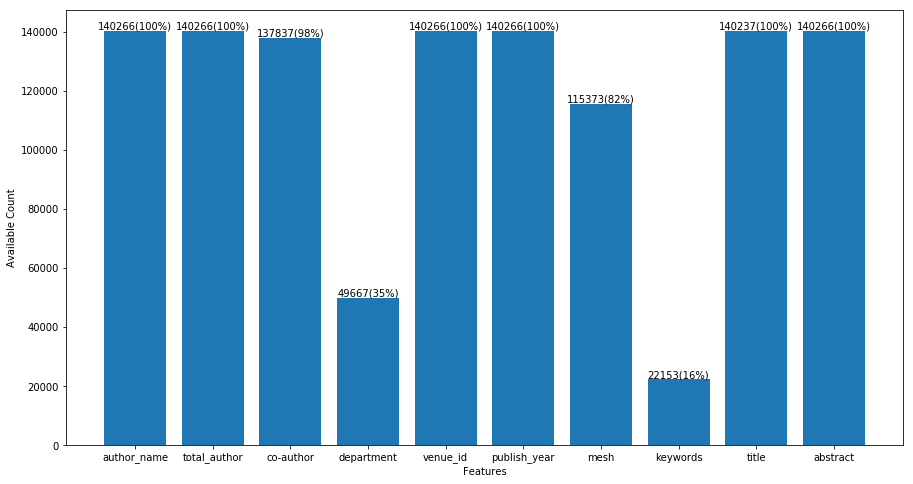

In [21]:
# plot data missing
labels = list(not_available_count.keys())
count = [total_record-count for count in list(not_available_count.values())]
# start plot
# Generating the y positions. Later, we'll use them to replace them with labels.
y_positions = range(len(labels))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.bar(y_positions, count)
rects = ax.patches
for rect, count in zip(rects, count):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5, str(count)+"("+"{0:.0%}".format(count/total_record)+")", ha = "center", va = "bottom")
#plt.xticks(labels)
plt.xticks(y_positions, labels)
plt.xlabel('Features')
plt.ylabel('Available Count')
plt.legend()
plt.show()
#fig.savefig("../plot/statistic_figs/labeled_feature_availablity.eps")

In [22]:
# find total number of papers using set
paperIDs = set(LabeledRecords["paperID"])
print("Total labeled papers:", len(paperIDs))

# find total number of author
authorIDs = set(LabeledRecords["authorID"])
print("Total number of author in labeled papers:", len(authorIDs))

# count number of paper each author write based on author ID
paperCounter = Counter([record["authorID"] for record in LabeledRecords_original])
print(paperCounter.most_common(3))

Total labeled papers: 135796
Total number of author in labeled papers: 9914
[('0000-0002-2381-2349', 587), ('0000-0002-9955-6003', 487), ('0000-0002-4295-6129', 423)]


In [41]:
# find number of author, sample for each name group
# find number of author, sample pass certain threshold
fileDir = "Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)

threshold = 100
threshold_change = [i for i in range(0, threshold,10)]
author_groups = []
total_author_count = []
total_sample_count = []

for file in listfiles:
    # group name
    temp = file.split("_")
    name = temp[1]+"_"+temp[-1]
    print("For name: ",name)
    # read needed content in labeled file
    labeled_data_part = read_labeled_file(fileDir+file)
    print("total sample size before apply threshold: ",len(labeled_data_part))
    # count number of paper each author write based on author ID
    paperCounter = Counter(labeled_data_part["authorID"])
    # collect statistic after apply threshold
    num_of_author = []
    num_of_sample = []
    for i in threshold_change:
        for k in list(paperCounter):
            if paperCounter[k] < i:
                del paperCounter[k]
        temp =list(paperCounter.keys())
        num_of_author.append(len(temp))
        # remove samples that are smaller than threshold
        labeled_data_part = labeled_data_part[labeled_data_part.authorID.isin(temp)]
        num_of_sample.append(len(labeled_data_part))
    author_groups.append(name)
    total_author_count.append(num_of_author)
    total_sample_count.append(num_of_sample)

For name:  j_read
total sample size before apply threshold:  136
For name:  f_esteves
total sample size before apply threshold:  34
For name:  c_miller
total sample size before apply threshold:  252
For name:  r_jha
total sample size before apply threshold:  11
For name:  a_lowe
total sample size before apply threshold:  102
For name:  a_vega
total sample size before apply threshold:  20
For name:  k_smith
total sample size before apply threshold:  338
For name:  j_gordon
total sample size before apply threshold:  19
For name:  s_liao
total sample size before apply threshold:  104
For name:  j_qian
total sample size before apply threshold:  17
For name:  s_bernardi
total sample size before apply threshold:  91
For name:  t_hill
total sample size before apply threshold:  15
For name:  s_schindler
total sample size before apply threshold:  51
For name:  j_williams
total sample size before apply threshold:  625
For name:  s_jacobson
total sample size before apply threshold:  28
For name: 

total sample size before apply threshold:  132
For name:  j_conde
total sample size before apply threshold:  84
For name:  k_wright
total sample size before apply threshold:  59
For name:  m_parker
total sample size before apply threshold:  280
For name:  h_huang
total sample size before apply threshold:  224
For name:  j_terry
total sample size before apply threshold:  57
For name:  y_xu
total sample size before apply threshold:  137
For name:  a_melo
total sample size before apply threshold:  48
For name:  r_doyle
total sample size before apply threshold:  11
For name:  m_bernardo
total sample size before apply threshold:  250
For name:  j_soares
total sample size before apply threshold:  49
For name:  j_richard
total sample size before apply threshold:  179
For name:  p_robinson
total sample size before apply threshold:  275
For name:  c_zou
total sample size before apply threshold:  32
For name:  s_rana
total sample size before apply threshold:  42
For name:  a_nunes
total sample s

total sample size before apply threshold:  104
For name:  m_lucas
total sample size before apply threshold:  75
For name:  w_lee
total sample size before apply threshold:  590
For name:  j_cheng
total sample size before apply threshold:  66
For name:  g_lewis
total sample size before apply threshold:  367
For name:  j_albert
total sample size before apply threshold:  78
For name:  k_goh
total sample size before apply threshold:  42
For name:  n_harris
total sample size before apply threshold:  14
For name:  s_hill
total sample size before apply threshold:  152
For name:  p_pathak
total sample size before apply threshold:  9
For name:  h_zeng
total sample size before apply threshold:  82
For name:  h_liu
total sample size before apply threshold:  439
For name:  s_bae
total sample size before apply threshold:  83
For name:  s_fernandes
total sample size before apply threshold:  38
For name:  a_miller
total sample size before apply threshold:  109
For name:  a_eklund
total sample size bef

For name:  l_campos
total sample size before apply threshold:  12
For name:  m_iqbal
total sample size before apply threshold:  8
For name:  s_lim
total sample size before apply threshold:  136
For name:  p_li
total sample size before apply threshold:  118
For name:  f_andrade
total sample size before apply threshold:  37
For name:  c_schmitt
total sample size before apply threshold:  13
For name:  t_tan
total sample size before apply threshold:  73
For name:  h_gomes
total sample size before apply threshold:  11
For name:  m_matos
total sample size before apply threshold:  82
For name:  k_ryan
total sample size before apply threshold:  182
For name:  w_zheng
total sample size before apply threshold:  93
For name:  j_franco
total sample size before apply threshold:  85
For name:  l_walker
total sample size before apply threshold:  194
For name:  a_gordon
total sample size before apply threshold:  126
For name:  z_yin
total sample size before apply threshold:  52
For name:  c_gu
total s

For name:  j_guerrero
total sample size before apply threshold:  15
For name:  r_coelho
total sample size before apply threshold:  26
For name:  a_masi
total sample size before apply threshold:  39
For name:  b_jackson
total sample size before apply threshold:  29
For name:  a_jha
total sample size before apply threshold:  39
For name:  m_mosquera
total sample size before apply threshold:  60
For name:  a_silva
total sample size before apply threshold:  786
For name:  m_guerra
total sample size before apply threshold:  18
For name:  h_suzuki
total sample size before apply threshold:  82
For name:  m_cohen
total sample size before apply threshold:  251
For name:  m_kobayashi
total sample size before apply threshold:  51
For name:  s_wright
total sample size before apply threshold:  61
For name:  a_mills
total sample size before apply threshold:  169
For name:  c_west
total sample size before apply threshold:  181
For name:  a_marino
total sample size before apply threshold:  15
For name

total sample size before apply threshold:  5
For name:  s_gandhi
total sample size before apply threshold:  9
For name:  c_yang
total sample size before apply threshold:  514
For name:  s_paul
total sample size before apply threshold:  52
For name:  l_roberts
total sample size before apply threshold:  363
For name:  s_keating
total sample size before apply threshold:  54
For name:  a_bennett
total sample size before apply threshold:  56
For name:  a_aggarwal
total sample size before apply threshold:  22
For name:  i_moura
total sample size before apply threshold:  203
For name:  d_teixeira
total sample size before apply threshold:  27
For name:  c_klein
total sample size before apply threshold:  106
For name:  m_andersson
total sample size before apply threshold:  152
For name:  h_shi
total sample size before apply threshold:  21
For name:  d_howard
total sample size before apply threshold:  79
For name:  j_thomsen
total sample size before apply threshold:  28
For name:  v_gupta
total 

total sample size before apply threshold:  31
For name:  m_bennett
total sample size before apply threshold:  208
For name:  a_sharma
total sample size before apply threshold:  223
For name:  z_wei
total sample size before apply threshold:  54
For name:  x_gu
total sample size before apply threshold:  61
For name:  l_yang
total sample size before apply threshold:  193
For name:  h_hassan
total sample size before apply threshold:  22
For name:  f_chen
total sample size before apply threshold:  40
For name:  g_rossi
total sample size before apply threshold:  245
For name:  s_patil
total sample size before apply threshold:  65
For name:  m_kelly
total sample size before apply threshold:  97
For name:  m_cheung
total sample size before apply threshold:  13
For name:  j_weaver
total sample size before apply threshold:  7
For name:  c_chien
total sample size before apply threshold:  157
For name:  s_yun
total sample size before apply threshold:  102
For name:  s_jung
total sample size before

For name:  y_lim
total sample size before apply threshold:  76
For name:  g_miller
total sample size before apply threshold:  76
For name:  x_kong
total sample size before apply threshold:  69
For name:  w_cao
total sample size before apply threshold:  126
For name:  c_ma
total sample size before apply threshold:  126
For name:  j_chin
total sample size before apply threshold:  27
For name:  h_kwon
total sample size before apply threshold:  35
For name:  s_gao
total sample size before apply threshold:  31
For name:  f_tian
total sample size before apply threshold:  17
For name:  f_martins
total sample size before apply threshold:  65
For name:  s_wolf
total sample size before apply threshold:  363
For name:  m_goldman
total sample size before apply threshold:  81
For name:  d_tang
total sample size before apply threshold:  89
For name:  m_adams
total sample size before apply threshold:  190
For name:  t_singh
total sample size before apply threshold:  52
For name:  m_thompson
total sam

For name:  j_walker
total sample size before apply threshold:  253
For name:  j_alves
total sample size before apply threshold:  53
For name:  j_seo
total sample size before apply threshold:  146
For name:  y_tang
total sample size before apply threshold:  66
For name:  a_norman
total sample size before apply threshold:  28
For name:  s_tanaka
total sample size before apply threshold:  80
For name:  c_wen
total sample size before apply threshold:  36
For name:  c_myers
total sample size before apply threshold:  100
For name:  v_santos
total sample size before apply threshold:  30
For name:  j_brown
total sample size before apply threshold:  290
For name:  b_pandey
total sample size before apply threshold:  42
For name:  d_morgan
total sample size before apply threshold:  86
For name:  r_smith
total sample size before apply threshold:  789
For name:  a_guerrero
total sample size before apply threshold:  57
For name:  a_grant
total sample size before apply threshold:  45
For name:  v_kum

In [42]:
print("Total author groups: ",len(author_groups))
print(author_groups[:3])
print("Threshold: ", threshold_change)
print(total_author_count[:3])
print(total_sample_count[:3])
row_totals_authors = [sum(x) for x in zip(*total_author_count)]
row_totals_samples = [sum(x) for x in zip(*total_sample_count)]
print(row_totals_authors)
print(row_totals_samples)

Total author groups:  1132
['j_read', 'f_esteves', 'c_miller']
Threshold:  [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
[[8, 3, 3, 3, 1, 1, 0, 0, 0, 0], [4, 2, 0, 0, 0, 0, 0, 0, 0, 0], [14, 8, 6, 3, 2, 1, 0, 0, 0, 0]]
[[136, 127, 127, 127, 57, 57, 0, 0, 0, 0], [34, 30, 0, 0, 0, 0, 0, 0, 0, 0], [252, 235, 201, 130, 91, 51, 0, 0, 0, 0]]
[9914, 3475, 1875, 1207, 848, 612, 471, 374, 299, 235]
[140266, 119654, 97546, 81444, 69125, 58779, 51076, 44837, 39279, 33888]


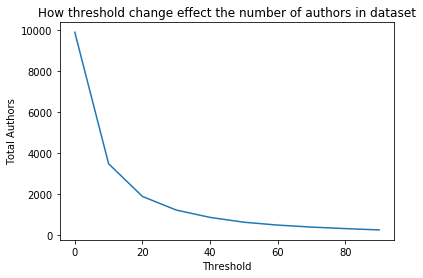

In [44]:
# plot author number change wrt threshold
fig, ax = plt.subplots()
ax.plot(threshold_change, row_totals_authors)
ax.set(xlabel='Threshold', ylabel='Total Authors',
       title='How threshold change effect the number of authors in dataset')
plt.show()
#fig.savefig("../Data/"+Dataset+"/statistic_figs/threshold_change.png", dpi=fig.dpi)

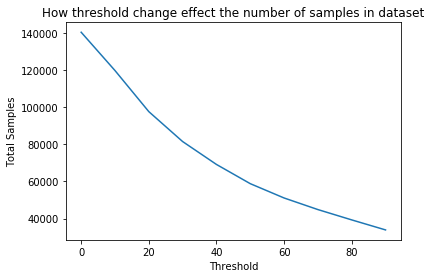

In [45]:
# plot sample number change wrt threshold
fig1, ax1 = plt.subplots()
ax1.plot(threshold_change, row_totals_samples)
ax1.set(xlabel='Threshold', ylabel='Total Samples',
       title='How threshold change effect the number of samples in dataset')
plt.show()

In [29]:
# find number of sample for each author
# find number of author, sample pass certain threshold
fileDir = "Data/"+Dataset+"/canopies_labeled/"
listfiles = os.listdir(fileDir)

threshold = 30
author_groups = []
total_author_count = []
total_sample_count = []

for file in listfiles:
    # group name
    temp = file.split("_")
    name = temp[1]+"_"+temp[-1]
    print("For name: ",name)
    # read needed content in labeled file
    labeled_data_part = read_labeled_file(fileDir+file)
    print("total sample size before apply threshold: ",len(labeled_data_part))
    # count number of paper each author write based on author ID
    paperCounter = Counter(labeled_data_part["authorID"])
    # collect statistic after apply threshold
    for k in list(paperCounter):
        if paperCounter[k] < threshold:
            del paperCounter[k]
    temp =list(paperCounter.keys())
    # remove samples that are smaller than threshold
    labeled_data_part = labeled_data_part[labeled_data_part.authorID.isin(temp)]
    if len(temp)>0:
        author_groups.append(name)
        total_author_count.append(len(temp))
        total_sample_count.append(len(labeled_data_part))

For name:  j_read
total sample size before apply threshold:  136
For name:  f_esteves
total sample size before apply threshold:  34
For name:  c_miller
total sample size before apply threshold:  252
For name:  r_jha
total sample size before apply threshold:  11
For name:  a_lowe
total sample size before apply threshold:  102
For name:  a_vega
total sample size before apply threshold:  20
For name:  k_smith
total sample size before apply threshold:  338
For name:  j_gordon
total sample size before apply threshold:  19
For name:  s_liao
total sample size before apply threshold:  104
For name:  j_qian
total sample size before apply threshold:  17
For name:  s_bernardi
total sample size before apply threshold:  91
For name:  t_hill
total sample size before apply threshold:  15
For name:  s_schindler
total sample size before apply threshold:  51
For name:  j_williams
total sample size before apply threshold:  625
For name:  s_jacobson
total sample size before apply threshold:  28
For name: 

For name:  n_romano
total sample size before apply threshold:  11
For name:  t_hara
total sample size before apply threshold:  23
For name:  t_wong
total sample size before apply threshold:  14
For name:  s_ross
total sample size before apply threshold:  25
For name:  d_richardson
total sample size before apply threshold:  456
For name:  j_moraes
total sample size before apply threshold:  26
For name:  e_moreno
total sample size before apply threshold:  83
For name:  r_little
total sample size before apply threshold:  4
For name:  t_kobayashi
total sample size before apply threshold:  150
For name:  a_lin
total sample size before apply threshold:  46
For name:  a_miranda
total sample size before apply threshold:  70
For name:  h_vogel
total sample size before apply threshold:  15
For name:  m_campos
total sample size before apply threshold:  148
For name:  d_stewart
total sample size before apply threshold:  294
For name:  j_abrantes
total sample size before apply threshold:  57
For na

total sample size before apply threshold:  185
For name:  a_rego
total sample size before apply threshold:  78
For name:  s_hammad
total sample size before apply threshold:  32
For name:  k_johansson
total sample size before apply threshold:  26
For name:  m_barreto
total sample size before apply threshold:  201
For name:  j_moore
total sample size before apply threshold:  154
For name:  a_gray
total sample size before apply threshold:  121
For name:  v_martins
total sample size before apply threshold:  104
For name:  t_zhou
total sample size before apply threshold:  76
For name:  s_howell
total sample size before apply threshold:  31
For name:  m_larsson
total sample size before apply threshold:  61
For name:  s_morris
total sample size before apply threshold:  33
For name:  s_biswas
total sample size before apply threshold:  37
For name:  s_patel
total sample size before apply threshold:  416
For name:  m_white
total sample size before apply threshold:  292
For name:  s_sherman
total

total sample size before apply threshold:  51
For name:  s_wright
total sample size before apply threshold:  61
For name:  a_mills
total sample size before apply threshold:  169
For name:  c_west
total sample size before apply threshold:  181
For name:  a_marino
total sample size before apply threshold:  15
For name:  r_jiang
total sample size before apply threshold:  102
For name:  t_becker
total sample size before apply threshold:  21
For name:  s_pedersen
total sample size before apply threshold:  322
For name:  a_ali
total sample size before apply threshold:  62
For name:  k_jones
total sample size before apply threshold:  607
For name:  m_becker
total sample size before apply threshold:  67
For name:  c_marshall
total sample size before apply threshold:  106
For name:  s_rafiq
total sample size before apply threshold:  33
For name:  h_liang
total sample size before apply threshold:  104
For name:  c_davis
total sample size before apply threshold:  43
For name:  e_hall
total sample

total sample size before apply threshold:  46
For name:  x_feng
total sample size before apply threshold:  102
For name:  w_hussein
total sample size before apply threshold:  33
For name:  c_santos
total sample size before apply threshold:  293
For name:  j_figueroa
total sample size before apply threshold:  59
For name:  w_cui
total sample size before apply threshold:  14
For name:  d_moreira
total sample size before apply threshold:  26
For name:  m_graham
total sample size before apply threshold:  64
For name:  g_dias
total sample size before apply threshold:  9
For name:  h_yoshida
total sample size before apply threshold:  72
For name:  m_branco
total sample size before apply threshold:  56
For name:  k_chong
total sample size before apply threshold:  39
For name:  j_kumar
total sample size before apply threshold:  16
For name:  a_shenoy
total sample size before apply threshold:  33
For name:  h_yang
total sample size before apply threshold:  417
For name:  m_magnusson
total sampl

total sample size before apply threshold:  227
For name:  w_wang
total sample size before apply threshold:  765
For name:  r_ross
total sample size before apply threshold:  374
For name:  k_yamamoto
total sample size before apply threshold:  106
For name:  j_silva
total sample size before apply threshold:  268
For name:  m_pellegrini
total sample size before apply threshold:  64
For name:  s_kwon
total sample size before apply threshold:  51
For name:  m_correa
total sample size before apply threshold:  72
For name:  a_pal
total sample size before apply threshold:  14
For name:  v_costa
total sample size before apply threshold:  141
For name:  j_allen
total sample size before apply threshold:  111
For name:  y_dong
total sample size before apply threshold:  76
For name:  m_fitzgerald
total sample size before apply threshold:  133
For name:  m_ferreira
total sample size before apply threshold:  253
For name:  m_roberts
total sample size before apply threshold:  320
For name:  y_lim
tota

total sample size before apply threshold:  636
For name:  j_savage
total sample size before apply threshold:  17
For name:  p_matthews
total sample size before apply threshold:  329
For name:  i_carvalho
total sample size before apply threshold:  39
For name:  j_parsons
total sample size before apply threshold:  255
For name:  s_oliveira
total sample size before apply threshold:  143
For name:  h_kang
total sample size before apply threshold:  47
For name:  s_vogt
total sample size before apply threshold:  93
For name:  d_garcia
total sample size before apply threshold:  60
For name:  w_xie
total sample size before apply threshold:  115
For name:  m_cruz
total sample size before apply threshold:  141
For name:  w_xu
total sample size before apply threshold:  126
For name:  k_roy
total sample size before apply threshold:  131
For name:  b_white
total sample size before apply threshold:  47
For name:  p_graham
total sample size before apply threshold:  89
For name:  d_rubin
total sample 

In [30]:
import heapq
print("Total author groups: ",len(author_groups))
print(author_groups[:3])
print(total_author_count[:3])
print(total_sample_count[:3])
print(sum(total_author_count))
print(sum(total_sample_count))

# find top 10 most ambiguity group
ambiguity_index = heapq.nlargest(10, range(len(total_author_count)), total_author_count.__getitem__)
print(ambiguity_index)
ambiguity_author = [author_groups[i] for i in ambiguity_index]
print("Most ambiguity group: ", ambiguity_author)
print("Most ambiguity group author count: ",heapq.nlargest(10, total_author_count))


Total author groups:  651
['j_read', 'c_miller', 'a_lowe']
[3, 3, 1]
[127, 130, 69]
1207
81444
[609, 118, 184, 626, 7, 271, 464, 545, 618, 286]
Most ambiguity group:  ['j_kim', 'y_wang', 'j_chen', 'l_wang', 'k_kim', 'y_zhang', 'h_chen', 'y_liu', 'h_wang', 'a_silva']
Most ambiguity group author count:  [20, 16, 12, 10, 8, 8, 8, 8, 8, 7]
